<a href="https://colab.research.google.com/github/nachitog83/mentoria_img/blob/master/3-Introduccion_AS/4_Introducci%C3%B3n_al_Aprendizaje_Supervisado_Detecci%C3%B3n_de_Objetos_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación </h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
<h2>Mentoría: Detección de objetos en imágenes</h2>
</center>


En la siguiente notebook, incorporaremos parte de lo realizado en las entregas de los grupos de estudiantes: 

* [Grupo 1](https://github.com/Ana1890/Deteccion-de-objetos-en-imagenes) : Ana Rusconi, Ignacio Grosso y  Mariano Lucero

* [Grupo 2](https://github.com/leorodriguez/mentoria-diplodatos-grupo2):  Diego Gonzalez, Florencia Caballero, Joel Vivas y Leonardo Rodriguez


<a name="aprendizaje_supervisado"></a>
### **Intro Aprendizaje Supervisado**

En esta entrega seguiremos utilizando la carpeta [muestra](https://drive.google.com/drive/folders/1_2oDQPL7n8QI_YEUOecAHyabwA9Gmud0?usp=sharing).


Repasaremos las técnicas aprendidas en la materia *'Introducción al Aprendizaje Automático'* tales como *regresión lineal y polinomial* con y sin regularización y para clasificación, implementaremos sólo los algoritmos de *Perceptrón, SGD y Árboles de Decisión*.





**Estructura del informe:** 

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:


  1- Recordar que en nuestro caso podemos realizar clasificación podemos hacer las dos clases de clasificación, binaria ( guantes: si - no) y multiclase ('mano', 'verde' y 'amarillo'). Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.
 
Separar la base en los conjuntos *P* y *G*. 
Y sobre cada conjunto, separar en *train* (con el 80 % de los datos y *test* con el 20%)


 
  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir como mucho las 5 mas representativas para:

  *   Regresión:

     a) Hacer una gráfica que muestre su relación con la variable objetivo. Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado. Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
    
     b) Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones. 
    
     c) Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste.
     d) Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.


  *   Clasificación:
   De a pares de características, implementar los algoritmos de Perceptrón, SGD y Árboles de Decisión en el conjunto Train para clasificación binaria: guantes si - guantes no (algoritmos del paquete sklearn). Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco.

   Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros. 

 

Usando como entorno a Colab:

In [1]:
#vinculamos el Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# librerías necesarias 
import os
from os import path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#seguimos agregando librerías necesarias:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

from sklearn.linear_model import Lasso, Ridge

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder




#### <a name="hay_tabla!"></a>
#### **Análisis exploratorio**

In [3]:
#nos posicionamos en la carpeta muestra:
os.chdir('/content/drive/My Drive/DiploDatos2020/Mentoria/muestra')
! ls -d Dataset-*/

Dataset-M/  Dataset-N/	Dataset-T/


In [4]:
#leemos el archivo de la tabla:
csv_wlabels_df = pd.read_csv('csv_wlabels_muestra_df_original.csv', index_col=0)
print(csv_wlabels_df.shape)
csv_wlabels_df.head()

(1668, 2061)


,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535


Esta tabla fue generada en una notebook anterior [2-Generación_de_fotos_recortadas_y_tabla-Análisis_y_Curación.ipynb](https://colab.research.google.com/drive/1fgB4F4DlBqkCvOatqo3whm4ZTPsiP0L7)

##### UTILIZAMOS COMO VARIABLE TARGET LA COLUMNA "GUANTES"



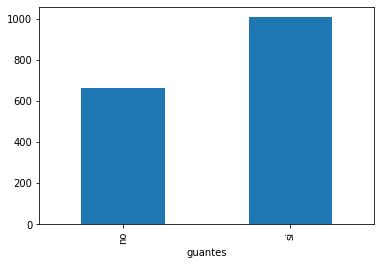

In [5]:
csv_wlabels_df.groupby('guantes').filename.count().plot(kind='bar')

In [6]:
perc_si = round(csv_wlabels_df[csv_wlabels_df.guantes=='si'].filename.count()/csv_wlabels_df.shape[0]*100, 2)
perc_no = round(csv_wlabels_df[csv_wlabels_df.guantes=='no'].filename.count()/csv_wlabels_df.shape[0]*100, 2)

In [7]:
print(f"PORCENTAJE SI: {perc_si}%\nPORCENTAJE NO: {perc_no}%")

PORCENTAJE SI: 60.31%
PORCENTAJE NO: 39.69%


##### UTILIZAMOS COMO VARIABLE TARGET LA COLUMNA "COLOR"

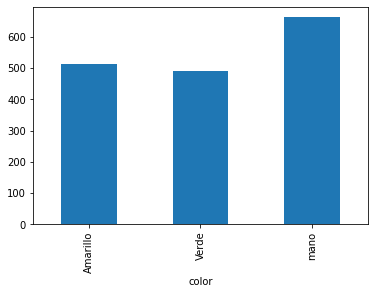

In [8]:
csv_wlabels_df.groupby('color').filename.count().plot(kind='bar')

In [9]:
perc_ama = round(csv_wlabels_df[csv_wlabels_df.color=='Amarillo'].filename.count()/csv_wlabels_df.shape[0]*100, 2)
perc_ver = round(csv_wlabels_df[csv_wlabels_df.color=='Verde'].filename.count()/csv_wlabels_df.shape[0]*100, 2)
perc_mano = round(csv_wlabels_df[csv_wlabels_df.color=='mano'].filename.count()/csv_wlabels_df.shape[0]*100, 2)

In [10]:
print(f"PORCENTAJE AMARILLO: {perc_ama}%\nPORCENTAJE VERDE: {perc_ver}%\nPORCENTAJE MANO: {perc_mano}%")

PORCENTAJE AMARILLO: 30.82%
PORCENTAJE VERDE: 29.5%
PORCENTAJE MANO: 39.69%


In [11]:
le_guantes = LabelEncoder()
le_time = LabelEncoder()
le_size = LabelEncoder()
le_color = LabelEncoder()
csv_wlabels_df.guantes = le_guantes.fit_transform(csv_wlabels_df.guantes)
csv_wlabels_df.Time = le_time.fit_transform(csv_wlabels_df.Time)
csv_wlabels_df.Size = le_size.fit_transform(csv_wlabels_df.Size)
csv_wlabels_df.color = le_color.fit_transform(csv_wlabels_df.color)

In [12]:
le_size.classes_

array(['G', 'P'], dtype=object)

In [44]:
X_P = csv_wlabels_df[csv_wlabels_df.Size == 1]
X_G = csv_wlabels_df[csv_wlabels_df.Size == 0]

In [45]:
y_P = X_P.guantes
X_P = X_P.drop(['guantes', 'color', 'filename', 'Type', 'xmin',	'xmax',	'ymin',	'ymax', 'Hand_Pixel_Width',	'Hand_Pixel_Height'], axis=1)

In [46]:
y_G = X_G.guantes
X_G = X_G.drop(['guantes', 'color', 'filename', 'Type', 'xmin',	'xmax',	'ymin',	'ymax', 'Hand_Pixel_Width',	'Hand_Pixel_Height'], axis=1)

In [47]:
best_P = SelectKBest(score_func=chi2, k=5)
fitP = best_P.fit(X_P,y_P)

In [48]:
best_G = SelectKBest(score_func=chi2, k=5)
fitG = best_G.fit(X_G,y_G)

In [49]:
colsP = best_P.get_support(indices=True)
colsG = best_G.get_support(indices=True)

In [50]:
X_P = X_P.iloc[:,colsP]
X_G = X_G.iloc[:,colsG]

In [51]:
X_P

,Area,164,518,792,1403
81,3570,0.172351,0.496787,0.280303,2.005965
82,5307,0.285534,1.079900,0.451190,1.082235
83,3888,0.096481,1.237995,0.704170,1.229397
84,1911,0.383117,1.009581,1.472560,0.721942
85,3224,0.310028,0.362154,0.117831,0.976635
...,...,...,...,...,...
1663,2150,0.349650,0.784744,0.214106,0.121876
1664,2250,0.008832,0.021945,0.197598,0.316754
1665,2352,0.912327,0.852391,0.370464,0.012818
1666,1886,0.040129,0.544776,0.055697,0.035641


In [52]:
X_G

,Area,164,481,1403,1933
0,60993,0.204712,1.021463,2.091972,1.979691
1,41168,0.120290,0.249811,2.350013,1.228421
2,37926,0.178590,0.372860,2.336970,1.497635
3,41472,0.771250,0.566044,1.617388,1.642392
4,41830,0.111715,1.101845,2.462201,2.048951
...,...,...,...,...,...
1592,55296,0.451484,0.024827,0.306600,2.173993
1593,28012,0.045033,0.095560,0.433284,0.527625
1594,19065,0.670121,0.242291,0.680856,0.994287
1595,46104,0.365268,0.361974,0.428196,1.001351


<Figure size 1008x864 with 0 Axes>

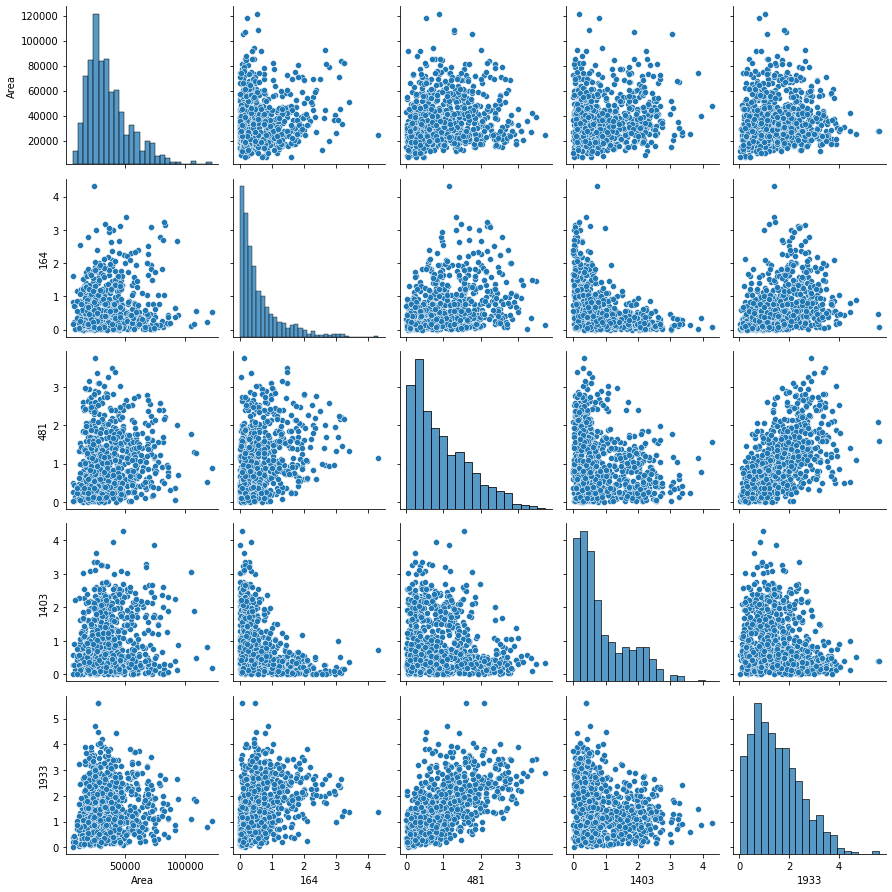

In [53]:
fig = plt.figure(figsize=(14,12))
sns.pairplot(X_G)

plt.tight_layout()
plt.show()

<Figure size 1008x864 with 0 Axes>

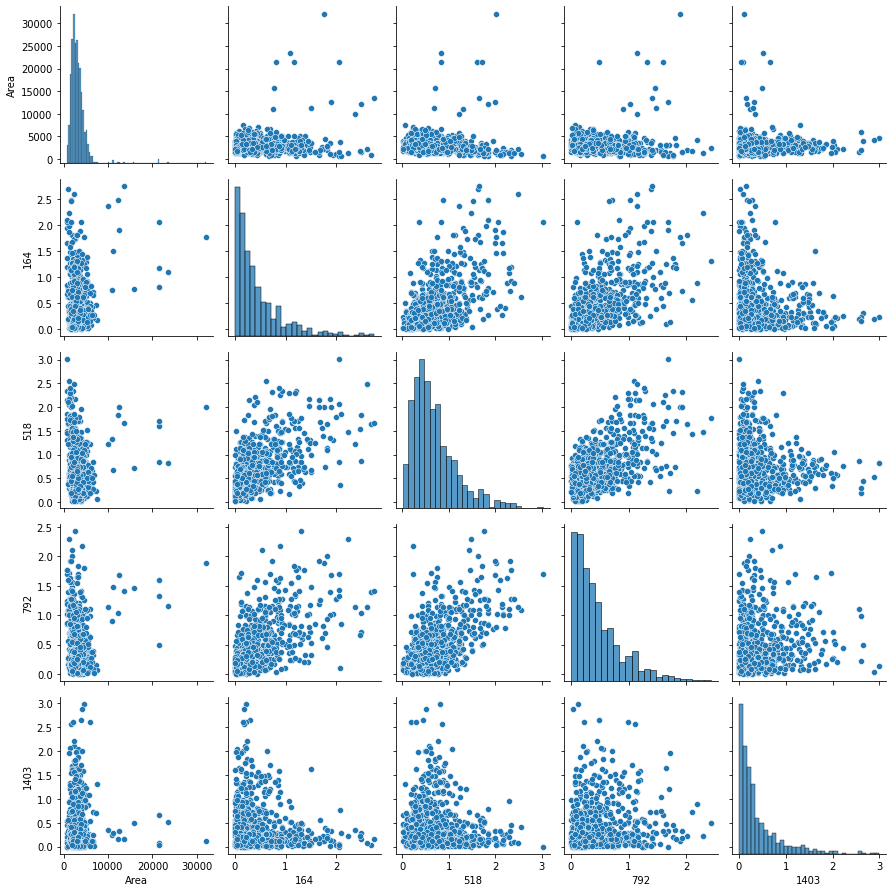

In [54]:
fig = plt.figure(figsize=(14,12))
sns.pairplot(X_P)

plt.tight_layout()
plt.show()

In [55]:
y_Gf = X_G['1933']
X_Gf = X_G.drop('1933', axis=1)
y_Pf = X_P['792']
X_Pf = X_P.drop('792', axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


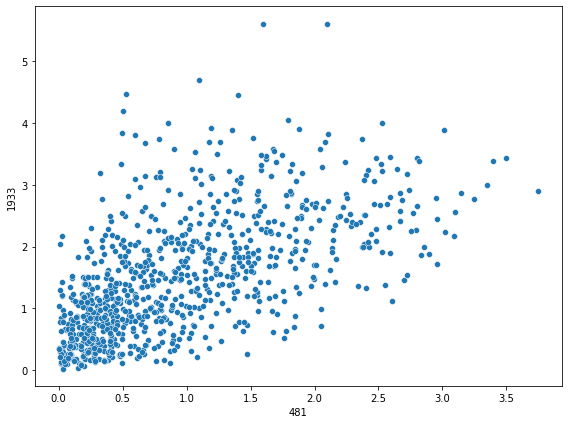

In [56]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(X_Gf['481'], y_Gf)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


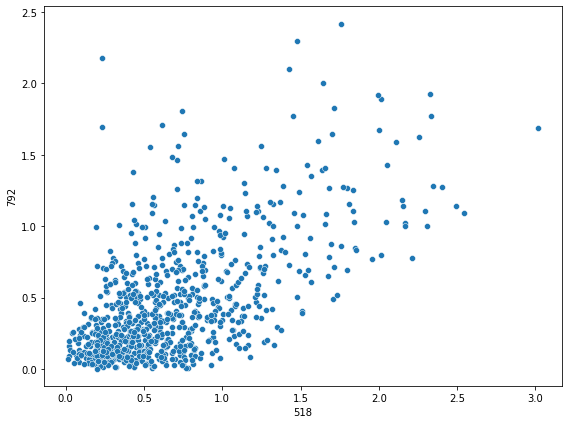

In [57]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(X_Pf['518'], y_Pf)

plt.tight_layout()
plt.show()

In [58]:
X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X_Gf, y_Gf, train_size=0.8, random_state=0)
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_Pf, y_Pf, train_size=0.8, random_state=0)

In [59]:
X_train_Gf = X_train_G['481'].values.reshape(-1,1)
X_test_Gf = X_test_G['481'].values.reshape(-1,1)
X_train_Gf.shape, X_test_Gf.shape

((697, 1), (175, 1))

In [60]:
modelG = LinearRegression()
modelG.fit(X_train_Gf, y_train_G)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_train_G_pred = modelG.predict(X_train_Gf)
y_test_G_pred = modelG.predict(X_test_Gf)

In [62]:
train_G_error = mean_squared_error(y_train_G, y_train_G_pred)
test_G_error = mean_squared_error(y_test_G, y_test_G_pred)
print(f'Train error: {round(train_G_error, 2)}')
print(f'Test error: {round(test_G_error, 2)}')

Train error: 0.61
Test error: 0.51


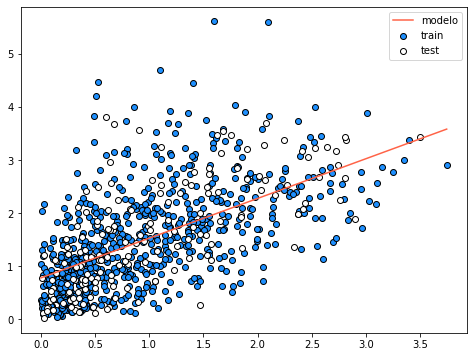

In [63]:
fig = plt.figure(figsize=(8,6))
x_start = min(np.min(X_train_Gf), np.min(X_test_Gf))
x_end = max(np.max(X_train_Gf), np.max(X_test_Gf))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, modelG.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_Gf, y_train_G, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_Gf, y_test_G, facecolor="white", edgecolor="k", label="test")
plt.legend()
plt.show()

In [64]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for degree in degrees:
    # train:
    poly = PolynomialFeatures(degree)
    lr = LinearRegression()
    modelGp = Pipeline([('poly', poly),
                    ('linear_reg', lr)])

    modelGp.fit(X_train_Gf, y_train_G)
    
    # predict:
    y_train_G_pred = modelGp.predict(X_train_Gf)
    y_test_G_pred = modelGp.predict(X_test_Gf)
    
    # evaluate:
    train_error = mean_squared_error(y_train_G, y_train_G_pred)
    test_error = mean_squared_error(y_test_G, y_test_G_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

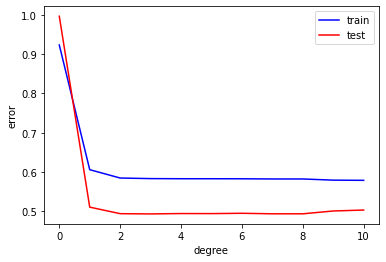

In [65]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [66]:
degree = 2
poly = PolynomialFeatures(degree)
lr = LinearRegression()
modelGp = Pipeline([('poly', poly),
                    ('linear_reg', lr)])

modelGp.fit(X_train_Gf, y_train_G)

# predict:
y_train_G_pred = modelGp.predict(X_train_Gf)
y_test_G_pred = modelGp.predict(X_test_Gf)

# evaluate:
train_error = mean_squared_error(y_train_G, y_train_G_pred)
test_error = mean_squared_error(y_test_G, y_test_G_pred)
print(f'Train error: {round(train_error, 2)}')
print(f'Test error: {round(test_error, 2)}')

Train error: 0.58
Test error: 0.49


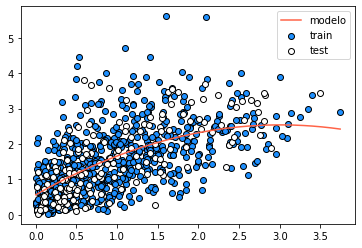

In [67]:
x_start = min(np.min(X_train_Gf), np.min(X_test_Gf))
x_end = max(np.max(X_train_Gf), np.max(X_test_Gf))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, modelGp.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_Gf, y_train_G, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_Gf, y_test_G, facecolor="white", edgecolor="k", label="test")
plt.legend()
plt.show()

In [68]:
X_train_G.shape, X_test_G.shape

((697, 4), (175, 4))

In [69]:
train_errors_all = []
test_errors_all = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for degree in degrees:
    # train:
    poly_all = PolynomialFeatures(degree)
    lr_all = LinearRegression()
    modelGp_all = Pipeline([('poly', poly_all),
                    ('linear_reg', lr_all)])

    modelGp_all.fit(X_train_G, y_train_G)  
    
    # predict:
    y_train_G_pred_all = modelGp_all.predict(X_train_G)
    y_test_G_pred_all = modelGp_all.predict(X_test_G)
    
    # evaluate:
    train_error = mean_squared_error(y_train_G, y_train_G_pred_all)
    test_error = mean_squared_error(y_test_G, y_test_G_pred_all)
    train_errors_all.append(train_error)
    test_errors_all.append(test_error)

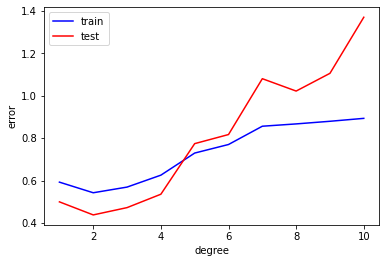

In [70]:
plt.plot(degrees, train_errors_all, color="blue", label="train")
plt.plot(degrees, test_errors_all, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [81]:
degree = 2
poly_all = PolynomialFeatures(degree)
lr_all = LinearRegression()
modelGp_all = Pipeline([('poly', poly_all),
                    ('linear_reg', lr_all)])

modelGp_all.fit(X_train_G, y_train_G)

# predict:
y_train_G_pred_all = modelGp_all.predict(X_train_G)
y_test_G_pred_all = modelGp_all.predict(X_test_G)

# evaluate:
train_error = mean_squared_error(y_train_G, y_train_G_pred_all)
test_error = mean_squared_error(y_test_G, y_test_G_pred_all)
print(f'Train error: {round(train_error, 2)}')
print(f'Test error: {round(test_error, 2)}')

Train error: 0.54
Test error: 0.44


In [82]:
degree = 2
poly = PolynomialFeatures(degree)
lr = LinearRegression()
modelGp = Pipeline([('poly', poly),
                    ('linear_reg', lr)])

parameters = {'linear_reg__fit_intercept':[True,False], 'linear_reg__normalize':[True,False], 'linear_reg__copy_X':[True, False]}

grid_search = GridSearchCV(modelGp, parameters, cv=2, n_jobs=1, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train_Gf, y_train_G)

print("r2 / variance : ", grid_search.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid_search.predict(X_test_Gf) - y_test_G) ** 2))

r2 / variance :  -0.7681238865347655
Residual sum of squares: 0.49


In [84]:
grid_search.cv_results_

{'mean_fit_time': array([0.00335348, 0.00251055, 0.00115526, 0.00122428, 0.00127459,
        0.00104702, 0.00094235, 0.00140882]),
 'mean_score_time': array([0.0010426 , 0.00111306, 0.00058913, 0.00060296, 0.00059664,
        0.00051272, 0.00051033, 0.00053525]),
 'mean_test_score': array([-0.76812389, -0.76812389, -0.76812389, -0.76812389, -0.76812389,
        -0.76812389, -0.76812389, -0.76812389]),
 'param_linear_reg__copy_X': masked_array(data=[True, True, True, True, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_linear_reg__fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_linear_reg__normalize': masked_array(data=[True, False, True, False, True, False, True, False],
              mask=[Fals

In [85]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [83]:
# predict:
y_train_G_pred = grid_search.predict(X_train_Gf)
y_test_G_pred = grid_search.predict(X_test_Gf)

# evaluate:
train_error = mean_squared_error(y_train_G, y_train_G_pred)
test_error = mean_squared_error(y_test_G, y_test_G_pred)
print(f'Train error: {round(train_error, 2)}')
print(f'Test error: {round(test_error, 2)}')

Train error: 0.58
Test error: 0.49
